<a href="https://colab.research.google.com/github/myrjybyn/CSST-104-3B-AY2526/blob/main/Lab_Act1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium

# **Task 2: Load Natural Earth Dataset**

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

<Axes: >

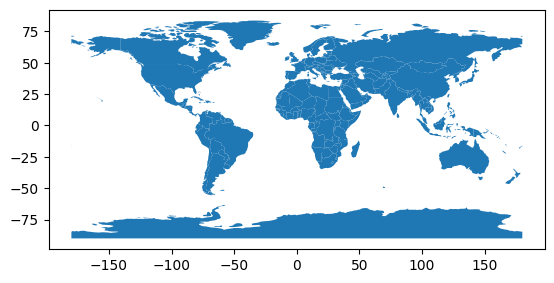

In [ ]:

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
print(world.head())
world.plot()

**GUIDE QUESTIONS**
1. How many columns does the dataset contain? **169 columns**
2. What type of geometries are included? **Multipolygon and Polygon**
3. What does the geometry column represent? **It represents the coordinates that makes up the shape of the plane/country.**

Screenshot of the first 5 rows output:

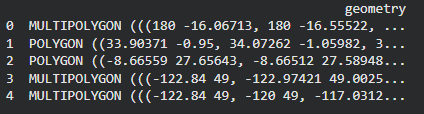


# **Task 3: Check the Coordinate Reference System**

In [ ]:
print("Current CRS: ", world.crs)

Current CRS:  EPSG:4326


**GUIDE QUESTIONS**
1. Why does EPSG:4326 represent? **It is the identifier for the World Geodetic System 1984 coordinate reference system. It maps data directly onto a 3D sphere, not a flat surface.**
2. Why is CRS important in spatial analysis? **For precise location pinpoiting**

# **Task 4: Convert to Metric CRS for Area Calculation**

In [ ]:
world_projected = world.to_crs(epsg=3857)

world_projected["area_m2"] = world_projected.geometry.area

print(world_projected[["ADMIN", "area_m2"]].head())
print("\nArea Reprojection Complete")

                         ADMIN       area_m2
0                         Fiji  2.128334e+10
1  United Republic of Tanzania  9.522552e+11
2               Western Sahara  1.171023e+11
3                       Canada  5.216648e+13
4     United States of America  2.186228e+13

Area Reprojection Complete


**GUIDE QUESTIONS**
1. Why can't we compute area accurately using EPSG:4326? **The spheroid shape version of the earth makes the distance distorted since it is measured in 3D unit (in degrees), making it inaccurate if it's plotted in a flat surface like a map.**
2. What unit is EPSG:3857 based on? **It is based on a map.**

Screenshot of the output:

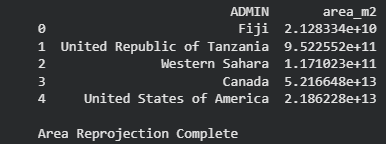

# **Task 5: Extract Centroid Coordinates**

In [ ]:
world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

print(world_projected[["ADMIN", "x", "y"]].head())

                         ADMIN             x             y
0                         Fiji  1.824878e+07 -1.958098e+06
1  United Republic of Tanzania  3.869296e+06 -7.003071e+05
2               Western Sahara -1.348403e+06  2.794163e+06
3                       Canada -1.079779e+07  1.044422e+07
4     United States of America -1.329713e+07  6.667416e+06


**GUIDE QUESTIONS**
1. What is a centroid? **A centroid is the geometric center of an object.**
2. How can centroid coordinates be used in clustering? **The centroid is also the average or mean of a cluster so instead of comparing all the data to one another to find where it belongs, you can only compare it to the top or average of a cluster to see if it fits there.**
3. Why do we extract X and Y separately? **To determine the coordinate of the centroid of a plane.**

Screenshot of the output:

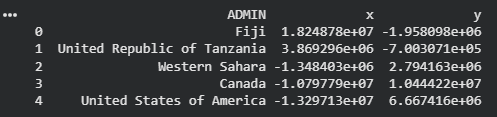

# **Task 5: Plot the top 10 countries**

Top 10 Largest Countries by Area (m^2):
                         ADMIN       area_m2
159                Antarctica  9.204514e+15
18                     Russia  8.304514e+13
3                      Canada  5.216648e+13
22                  Greenland  3.628550e+13
4    United States of America  2.186228e+13
139                     China  1.497731e+13
137                 Australia  9.651737e+12
29                     Brazil  9.059541e+12
5                  Kazakhstan  6.177084e+12
9                   Argentina  4.328068e+12


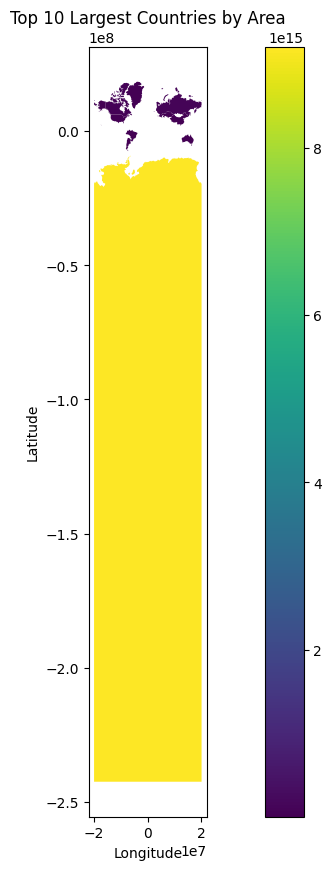

In [ ]:
top_10_countries = world_projected.sort_values(by='area_m2', ascending=False).head(10)

print("Top 10 Largest Countries by Area (m^2):\n", top_10_countries[["ADMIN", "area_m2"]])

top_10_countries.plot(column='area_m2', legend=True, figsize=(15, 10), cmap='viridis')
plt.title('Top 10 Largest Countries by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Reflection**

One of the difficulties I encountered was understanding the dataset and the CRS since I have no prior knowledge regarding the terminologies. It wasn't also discussed previously so I had a hard time understanding anything about the activity. I learned that spatial data is about "where" in the world or the map is a location and how it looks like using numbers.